# VOCC to yolo (xml to txt) conversion

In [2]:
import os
os.getcwd()

'c:\\Users\\jackp\\Downloads\\yolo_tflite\\상품데이터'

In [9]:
import re
import xml.etree.ElementTree as ET

# Function to get the data from XML Annotation
def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
        if elem.tag == "filename":
            info_dict['filename'] = elem.text
            
        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = re.sub("\!|\'|\?|\)","",subelem.text)
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

In [61]:
from pprint import pprint #pretty print

pprint(extract_info_from_xml('./obj/10094_크라운)콘초66G/10094_0_m_1.xml'))

{'bboxes': [{'class': '크라운콘초66G',
             'xmax': 1320,
             'xmin': 149,
             'ymax': 2360,
             'ymin': 820},
            {'class': '크라운콘초66G',
             'xmax': 2092,
             'xmin': 1110,
             'ymax': 2278,
             'ymin': 848},
            {'class': '크라운콘초66G',
             'xmax': 2791,
             'xmin': 1823,
             'ymax': 2200,
             'ymin': 869}],
 'filename': '10094_0_m_1.jpg',
 'image_size': (2988, 2988, 3)}


In [40]:
# try few things
import os
data_path_li = []
for (path, dir, files) in os.walk('./obj'):
  data_path_li.append(path)

pprint(data_path_li)

['./obj',
 './obj\\10091_꼬깔콘고소한맛72G',
 './obj\\10092_농심오징어집83G',
 './obj\\10093_농심매운새우깡90G',
 './obj\\10094_크라운)콘초66G',
 './obj\\10095_농심바나나킥75G',
 './obj\\10210_오리온)포카칩오리지널66G',
 './obj\\20165_삼양)사또밥갈릭버터맛52G',
 './obj\\20166_해태)구운대파70G',
 './obj\\20167_해태)오사쯔60G',
 './obj\\20171_농심알새우칩68G',
 './obj\\20211_크라운)카라멜메이플콘74G',
 './obj\\25197_롯데제과)도리토스나쵸치즈맛40G',
 './obj\\30060_농심벌집핏자90G',
 './obj\\30061_농심포스틱84G',
 './obj\\30063_빙그레꽃게랑오리지널맛70G',
 './obj\\30064_크라운)꽃게랑불짬뽕맛70G',
 './obj\\30065_크라운)꽃게랑와사비70G',
 './obj\\30067_오리온)포카칩양파66G',
 './obj\\30120_롯데)꼬깔콘매콤달콤72G',
 './obj\\30133_포카칩오리지널110G',
 './obj\\30135_크라운)콘칩골드117G',
 './obj\\30166_롯데)치토스후라이드_양념치킨맛80G',
 './obj\\40088_오리온썬핫스파이시맛80G',
 './obj\\40089_오리온꼬북칩80G',
 './obj\\40090_롯데치토스스모키바베큐맛88G',
 './obj\\40091_꼬깔콘군옥수수맛72G',
 './obj\\40095_농심새우깡90G',
 './obj\\40105_롯데)초코빼빼로54G',
 './obj\\40106_롯데)아몬드빼빼로37G',
 './obj\\40110_롯데)누드초코빼빼로50G',
 './obj\\40146_롯데쌀로별오리지널78G',
 './obj\\40147_오리온오감자양념바베큐맛50G',
 './obj\\40150_삼양짱구115g',
 './obj\\4

In [28]:
os.getcwd()

'c:\\Users\\jackp\\Downloads\\yolo_tflite\\상품데이터'

In [63]:
# current structure: (cwd)/obj/90186_오리온땅콩강정80G ~ etc.

## set root directory, uncomment below for Gdrive
## /content/drive/MyDrive/상품데이터/obj/90186_오리온땅콩강정80G etc
# !ln -s "/content/drive/MyDrive/" "/mydrive"
# %cd /mydrive/상품데이터

directory = 'obj'

# directory -> files loop
tmp=[]
for dir in glob.iglob(f'{directory}/*'):
    for file in glob.iglob(f'{dir}/*.xml'):
        if file[-8:] != 'meta.xml':
            tmp.append(file)
tmp.sort()


In [73]:
# Dictionary that maps class names to IDs
class_name_to_id_mapping = {'꼬깔콘고소한맛72G': 0, '농심오징어집83G': 1, '농심매운새우깡90G': 2, 
                            '크라운콘초66G': 3, '농심바나나킥75G': 4, '오리온포카칩오리지널66G': 5, 
                            '삼양사또밥갈릭버터맛52G': 6, '해태구운대파70G': 7, '해태오사쯔60G': 8, '농심알새우칩68G': 9, 
                            '크라운카라멜메이플콘74G': 10, '롯데제과도리토스나쵸치즈맛40G': 11, '농심벌집핏자90G': 12, 
                            '농심포스틱84G': 13, '빙그레꽃게랑오리지널맛70G': 14, '크라운꽃게랑불짬뽕맛70G': 15, 
                            '크라운꽃게랑와사비70G': 16, '오리온포카칩양파66G': 17, '롯데꼬깔콘매콤달콤72G': 18, 
                            '포카칩오리지널110G': 19, '크라운콘칩골드117G': 20, '롯데치토스후라이드양념치킨맛80G': 21, 
                            '오리온썬핫스파이시맛80G': 22, '오리온꼬북칩80G': 23, '롯데치토스스모키바베큐맛88G': 24, 
                            '꼬깔콘군옥수수맛72G': 25, '농심새우깡90G': 26, '롯데초코빼빼로54G': 27, '롯데아몬드빼빼로37G': 28, 
                            '롯데누드초코빼빼로50G': 29, '롯데쌀로별오리지널78G': 30, '오리온오감자양념바베큐맛50G': 31, 
                            '삼양짱구115g': 32, '오포카칩어니언맛110g': 33, '오리온태양의맛썬64g': 34, '롯데제과꼬깔콘고소한맛42G': 35, 
                            '농심자갈치90G': 36, '도리토스갈비천왕치킨맛172G': 37, '크라운콘칩군옥수수70G': 38, '오리온눈을감자113G': 39, 
                            '크라운못말리는신짱120G': 40, '오리온눈을감자M56G': 41, '롯데치토스매콤달콤한맛88G': 42, 
                            '오리온오징어땅콩98G': 43, '농심고구마깡83G': 44, '오리온오감자감자그라탕맛50G': 45, '크라운죠리퐁74G': 46, 
                            '해태허니버터칩60G': 47, '삼양사또밥67G': 48, '농심양파링84G': 49, '오리온땅콩강정80G': 50, 
                            '오리온썬갈릭바게트맛64G': 51}

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolo_label(info_dict, directory):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save 
    save_file_name = os.path.join(directory, info_dict["filename"].replace("jpg", "txt"))
    
    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))

- ERROR on 30166_롯데)치토스후라이드_양념치킨맛80G, 50117_크라운)콘칩(군옥수수)70G
- removed two folders above to jump to training process

In [140]:
# Convert and save the annotations
# ERROR on 30166_롯데)치토스후라이드_양념치킨맛80G, 50117_크라운)콘칩(군옥수수)70G
# removed two folders above to jump to training process

from tqdm import tqdm
import glob

directory = 'obj'
for dir in tqdm(glob.iglob(f'{directory}/*')):
    for file in glob.iglob(f'{dir}/*.xml'):
        if file[-8:] != 'meta.xml':
            info_dict = extract_info_from_xml(file)
            convert_to_yolo_label(info_dict, dir)

annotations=[]
for dir in glob.iglob(f'{directory}/*'):
    for file in glob.iglob(f'{dir}/*.txt'):
        annotations.append(file)

50it [01:02,  1.25s/it]


In [77]:
annotations[:20]

['obj\\70083_오리온)눈을감자113G\\70083_00_m_1.txt',
 'obj\\70083_오리온)눈을감자113G\\70083_00_m_10.txt',
 'obj\\70083_오리온)눈을감자113G\\70083_00_m_11.txt',
 'obj\\70083_오리온)눈을감자113G\\70083_00_m_12.txt',
 'obj\\70083_오리온)눈을감자113G\\70083_00_m_13.txt',
 'obj\\70083_오리온)눈을감자113G\\70083_00_m_14.txt',
 'obj\\70083_오리온)눈을감자113G\\70083_00_m_15.txt',
 'obj\\70083_오리온)눈을감자113G\\70083_00_m_16.txt',
 'obj\\70083_오리온)눈을감자113G\\70083_00_m_18.txt',
 'obj\\70083_오리온)눈을감자113G\\70083_00_m_19.txt',
 'obj\\70083_오리온)눈을감자113G\\70083_00_m_2.txt',
 'obj\\70083_오리온)눈을감자113G\\70083_00_m_21.txt',
 'obj\\70083_오리온)눈을감자113G\\70083_00_m_22.txt',
 'obj\\70083_오리온)눈을감자113G\\70083_00_m_23.txt',
 'obj\\70083_오리온)눈을감자113G\\70083_00_m_3.txt',
 'obj\\70083_오리온)눈을감자113G\\70083_00_m_5.txt',
 'obj\\70083_오리온)눈을감자113G\\70083_00_m_6.txt',
 'obj\\70083_오리온)눈을감자113G\\70083_00_m_7.txt',
 'obj\\70083_오리온)눈을감자113G\\70083_00_m_8.txt',
 'obj\\70083_오리온)눈을감자113G\\70083_00_m_9.txt']

In [78]:
# use later to save image list
img_path_list=[]
for dir in glob.iglob(f'{directory}/*'):
    for file in glob.iglob(f'{dir}/*.jpg'):
        img_path_list.append(file)

with open('list_of_image_loc.txt', 'w') as file:
    file.write('\n'.join(img_path_list) + '\n')

In [101]:
import random
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

random.seed(0)

font = ImageFont.truetype('./fonts/NanumGothic-Regular.ttf', 10)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        print(x0, y0, x1, y1)
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))], encoding='utf8', font=font)
    
    plt.imshow(np.array(image))
    plt.show()

62.74800000000005 1283.346 1395.396 2433.726
1538.8199999999997 654.3720000000001 2805.732 1933.236
794.808 1135.44 2145.384 2133.4320000000002


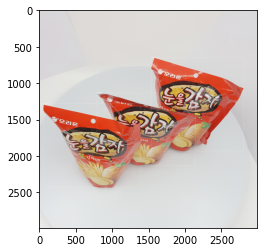

In [104]:

# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r", encoding='utf8') as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("annotations", "images").replace("txt", "jpg")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)
# image
#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [114]:
# get image path, txt(label) path for train/val split
img_path_list=[]
for dir in glob.iglob(f'{directory}/*'):
    for file in glob.iglob(f'{dir}/*.jpg'):
        img_path_list.append(file)

# already have annotations (text file paths)
annotations=[]
for dir in glob.iglob(f'{directory}/*'):
    for file in glob.iglob(f'{dir}/*.txt'):
        annotations.append(file)

img_path_list.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
from sklearn.model_selection import train_test_split

train_images, val_images = train_test_split(img_path_list, test_size = 0.1, random_state = 2021)

In [116]:
len(train_images), len(val_images)

(5130, 570)

In [118]:
cwd = os.getcwd()
cwd

'c:\\Users\\jackp\\Downloads\\yolo_tflite\\상품데이터'

In [117]:
# save train / validation list to txt
with open('train.txt', 'w') as file:
    file.write('\n'.join(train_images) + '\n')

with open('test.txt', 'w') as file:
    file.write('\n'.join(val_images.keys()) + '\n')

In [139]:
# obj.data (classes, train, valid, names, backup) | obj.names (class names in class_name_to_id_mapping) file creation

with open('obj.names', 'w') as file:
    file.write('\n'.join(class_name_to_id_mapping.keys()) + '\n')

## set root directory, uncomment below for Gdrive
## /content/drive/MyDrive/상품데이터/obj/90186_오리온땅콩강정80G etc
# !ln -s "/content/drive/MyDrive/" "/mydrive"
# %cd /mydrive/상품데이터
with open('obj.data', 'w') as file:
    file.write('classes = ' + str(len(class_name_to_id_mapping.values())) + '\n')
    file.write('train = ' + directory + '/train.txt' + '\n')
    file.write('valid = ' + directory + '/test.txt' + '\n')
    file.write('names = ' + directory + '/obj.names' + '\n')
    file.write('backup = ' + cwd + '/yolov4/training')

---
# prepare darknet, yolo, etc
- a. clone yolo version (2,3,4)
- b. clone darknet
- c. get yolo version & weight related config (fp32, fp16, int8-tiny)
- d. customize config

In [ ]:
!git clone yolov4

In [ ]:
!git clone https://github.com/AlexeyAB/darknet
